In [1]:
import random as rnd
import numpy as np
import statistics as stat
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Movimiento Browniano...
## Procesos Estocásticos 2023-2
## Juan Pablo Rodríguez Villagran

Partamos de la definición del *movimiento Browniano*:<br>
**Definición.** Una familia de variables aleatorias $(B_t)_{t\geq0}$ es un *movimiento Browniano estándar* si satisface:
1. $W_0=0$,
2. Tiene incrementos independientes y estacionarios,
3. Si $t_1<t_2$, entonces $W_{t_2}-W_{t_1}\sim\text{N}(0,t_2-t_1)$.<br>

Ya habíamos quedado que es un *proceso de difusión* y que la función de densidad de $f_{W_t}(x;t)$ satisface la EDP de difusión:
$$\frac{1}{2}\frac{\partial^2f}{\partial x^2}=\frac{\partial f}{\partial t},\qquad f(x,0)=\delta(x)$$
o la EDE
$$dX_t=dB_t.$$
Una de las primeras cosas que notamos es que la densidad tiene varianza creciente en $t$ lo cual graficamos como:

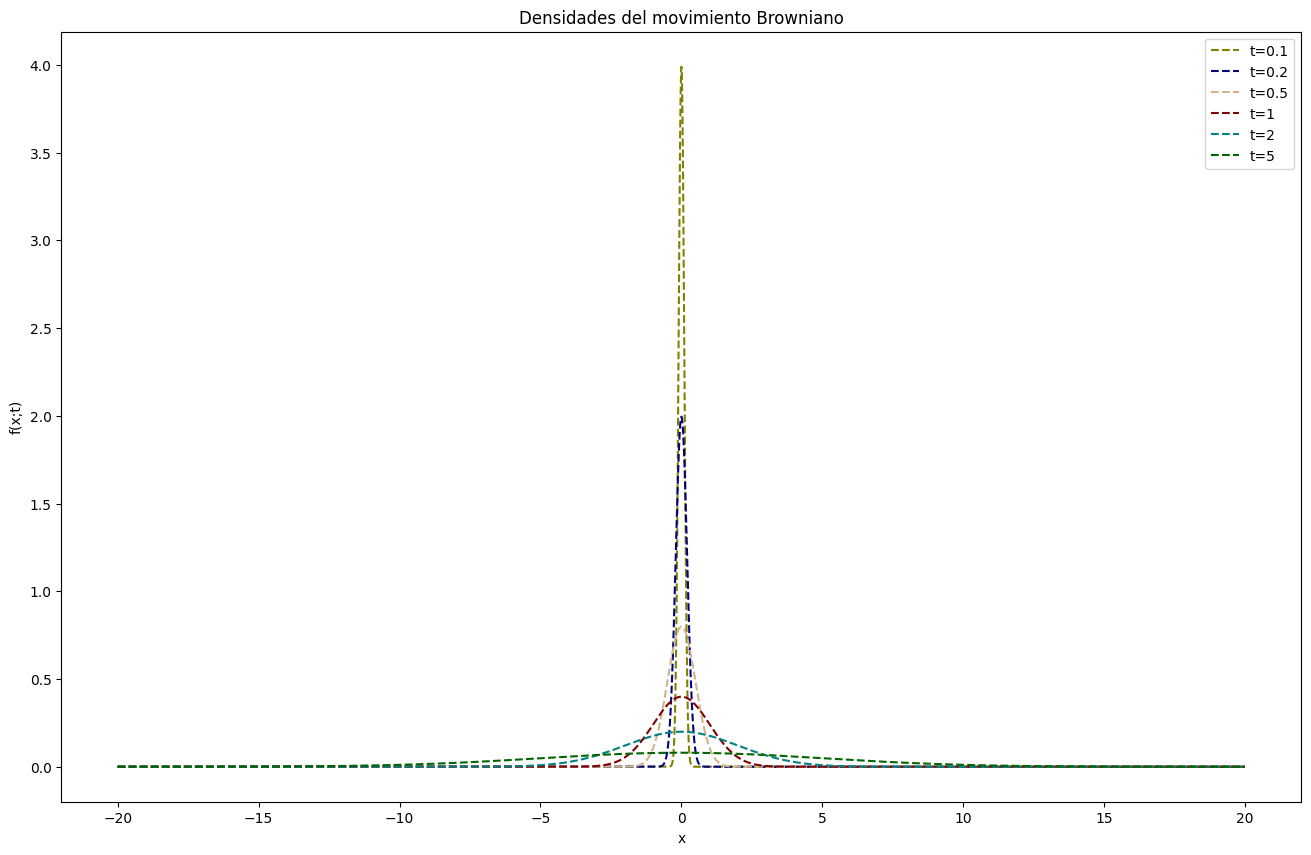

In [13]:
x = np.arange(-20,20,0.01)
plt.figure(figsize=[16,10])
plt.plot(x,sc.stats.norm.pdf(x,0,0.1),linestyle='--',color='olive',label='t=0.1')
plt.plot(x,sc.stats.norm.pdf(x,0,0.2),linestyle='--',color='navy',label='t=0.2')
plt.plot(x,sc.stats.norm.pdf(x,0,0.5),linestyle='--',color='tan',label='t=0.5')
plt.plot(x,sc.stats.norm.pdf(x,0,1),linestyle='--',color='maroon',label='t=1')
plt.plot(x,sc.stats.norm.pdf(x,0,2),linestyle='--',color='teal',label='t=2')
plt.plot(x,sc.stats.norm.pdf(x,0,5),linestyle='--',color='darkgreen',label='t=5')
plt.title('Densidades del movimiento Browniano')
plt.xlabel('x')
plt.ylabel('f(x;t)')
#plt.grid('on')
plt.legend()
plt.show()

Ahora, para simular tal cual trayectorias del movimiento Browniano. Hay varias maneras, pero en clase se habló de que las propiedades de una caminata aleatoria simétrica las hereda el movimiento Browniano estándar.<br>
**Definición.** Sea $\{X_n\}_{n\geq1}$ una sucesión de variables aleatorias independientes idénticamente distribuidas tales que $\mathbb{P}[X_n=1]=p=1-\mathbb{P}[X_n=-1]$, definimos la caminata aleatoria $\{S_n\}_{n\geq1}$ como:
$$S_0=0,\quad S_n=S_{n-1}+X_n=c+\sum_{i=1}^nX_i.$$
**Teorema (del Límite Central).** Sea $\{X_n\}_{n\geq1}$ una sucesión de variables aleatorias independientes idénticamente distribuidas con esperanza $\mu$ y varianza $\sigma^2$, definiendo $S_n=\sum_{i=1}^nX_i$, entonces:
$$\lim_{n\to\infty}\mathbb{P}\left[\frac{S_n-\mu}{\sigma}\leq x\right]=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^xe^{-\frac{y^2}{2}}dy,$$
es decir, $\frac{S_n-\mu}{\sigma}\overset{d}{\to}X$ donde $X\sim\text{N}(0,1)$.<br>
En particular el teorema anterior se satisface para las v.a.s de la caminata aleatoria, entonces parece razonable aproximar un movimiento Browniano estándar con una caminata aleatoria pero de pasos arbitrariamente pequeños.

Sea $\delta>0$, definimos la sucesión de variables aleatorias independientes idénticamente distribuidas $\{X_n\}_{n\geq1}$:
$$\mathbb{P}[X_n=\sqrt{\delta}]=\mathbb{P}[X_n=-\sqrt{\delta}]=\frac{1}{2},$$
de aquí notamos que la esperanza y la varianza de cada $X_i$ son:
$$\mathbb{E}[X_i]=0\qquad\text{y}\qquad\text{Var}(X_i)=\delta.$$
A partir de esto, nos gustaría definir un proceso $B_t$ de modo que $B_0=0$ y al tiempo $t=n\delta$ tengamos que:
$$B_t=B_{n\delta}=\sum_{i=1}^nX_i.$$
De aquí notamos que, por linealidad:
$$\mathbb{E}[B_t]=\sum_{i=1}^n\mathbb{E}[X_i]=0\quad\text{y}\quad\text{Var}(B_t)=\sum_{i=1}^n\text{Var}(X_t)=n\text{Var}(X_1)=n\delta=t.$$
Entonces, por el Teotema del Límite Central, cuando $n\to\infty$ se tiene que $B_t\sim N(0,t)$.

In [38]:
# Hasta qué tiempo queremos el proceso
t = 10
# Cuántos pasos queremos
n = 1000000
# Definimos el tamaño del paso como
delta = t/n
# Los caminos que puede tomar el caminante
Dirs = [-delta,delta]
# Definimos las probas de la caminata simétrica
p = 0.5
Probas = [1-p, p]

In [39]:
# Replicamos lo de la caminata aleatoria
Pasos = rnd.choices(Dirs,Probas,k=n)
Pasos.insert(0,0)
Tray = np.cumsum(Pasos)

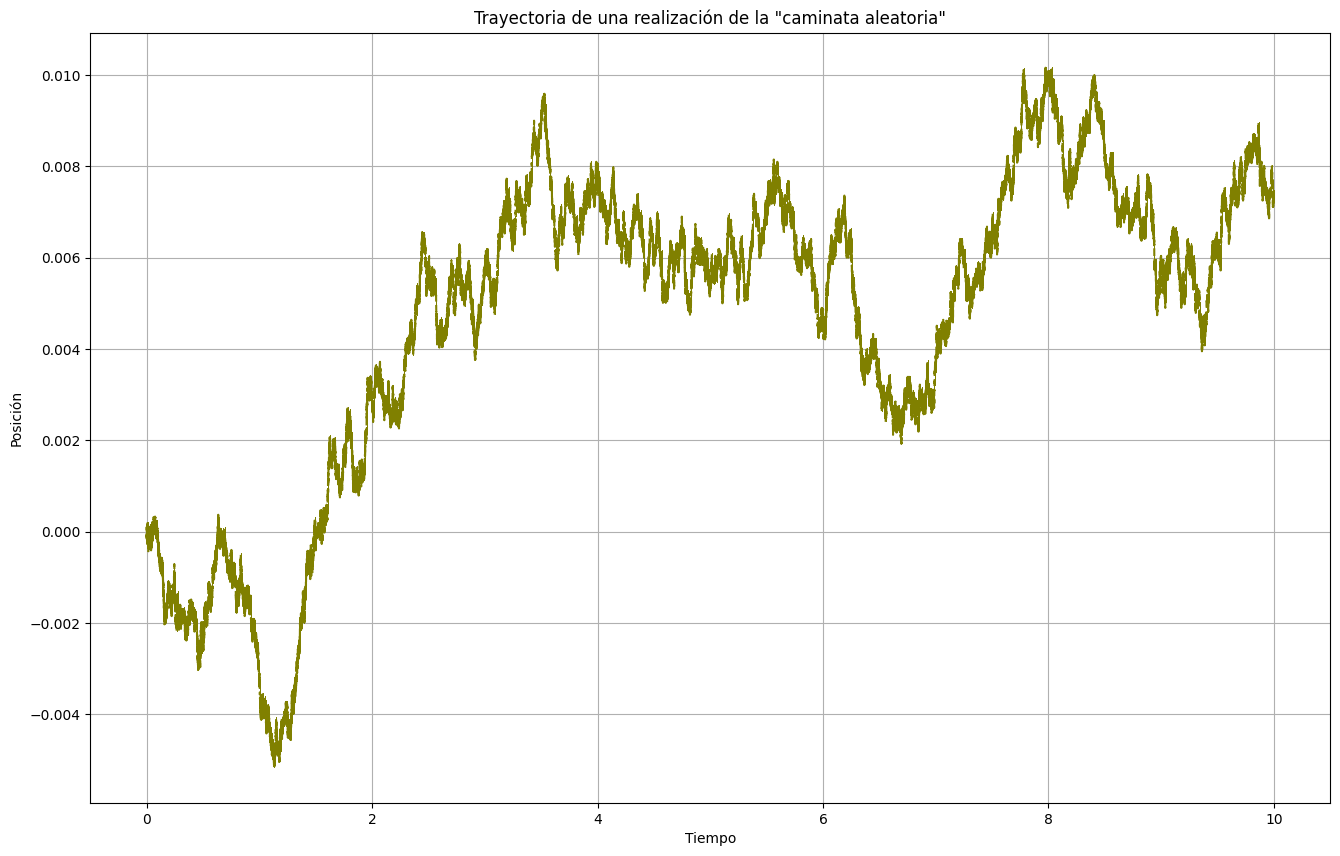

In [41]:
Ts = np.arange(0,t+delta,delta)
plt.figure(figsize=[16,10])
plt.plot(Ts,Tray,linestyle='--',marker=',',color='olive')
plt.title('Trayectoria de una realización de la "caminata aleatoria"')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.show()

#### Más Movimientos Brownianos:
El movimiento Browniano *estándar* se llama así porque es casi una variable aleatoria normal estándar (varianza 1), lo primero que se puede hacer es quitarle lo estándar cambiándole la varianza (puede que la varianza sea incluso función del tiempo, como suele ser en la realidad):<br>
**Definición.** Sea $(B_t)_{t\geq0}$ un movimiento Browniano estándar y $\sigma^2>0$, decimos que $(B_t^{(1)})_{t\geq0}$ es un movimiento Browniano **no estándar** de varianza $\sigma^2$ si para cada $t\geq0$:
$$B_t^{(1)}=\sigma B_t.$$
La única modificación que debemos hacer entonces a lo que ya tenemos, es agregar un factor que multiplique al tamaño de paso $\delta$.

In [42]:
# Hasta qué tiempo queremos el proceso
t = 10
# Cuántos pasos queremos
n = 1000000
# Definimos el tamaño del paso como
delta = t/n
# Desviación estándar
sd = 5
# Los caminos que puede tomar el caminante
Dirs = [-sd*delta,sd*delta]
# Definimos las probas de la caminata simétrica
p = 0.5
Probas = [1-p, p]

In [43]:
# Replicamos lo de la caminata aleatoria
Pasos = rnd.choices(Dirs,Probas,k=n)
Pasos.insert(0,0)
Tray = np.cumsum(Pasos)

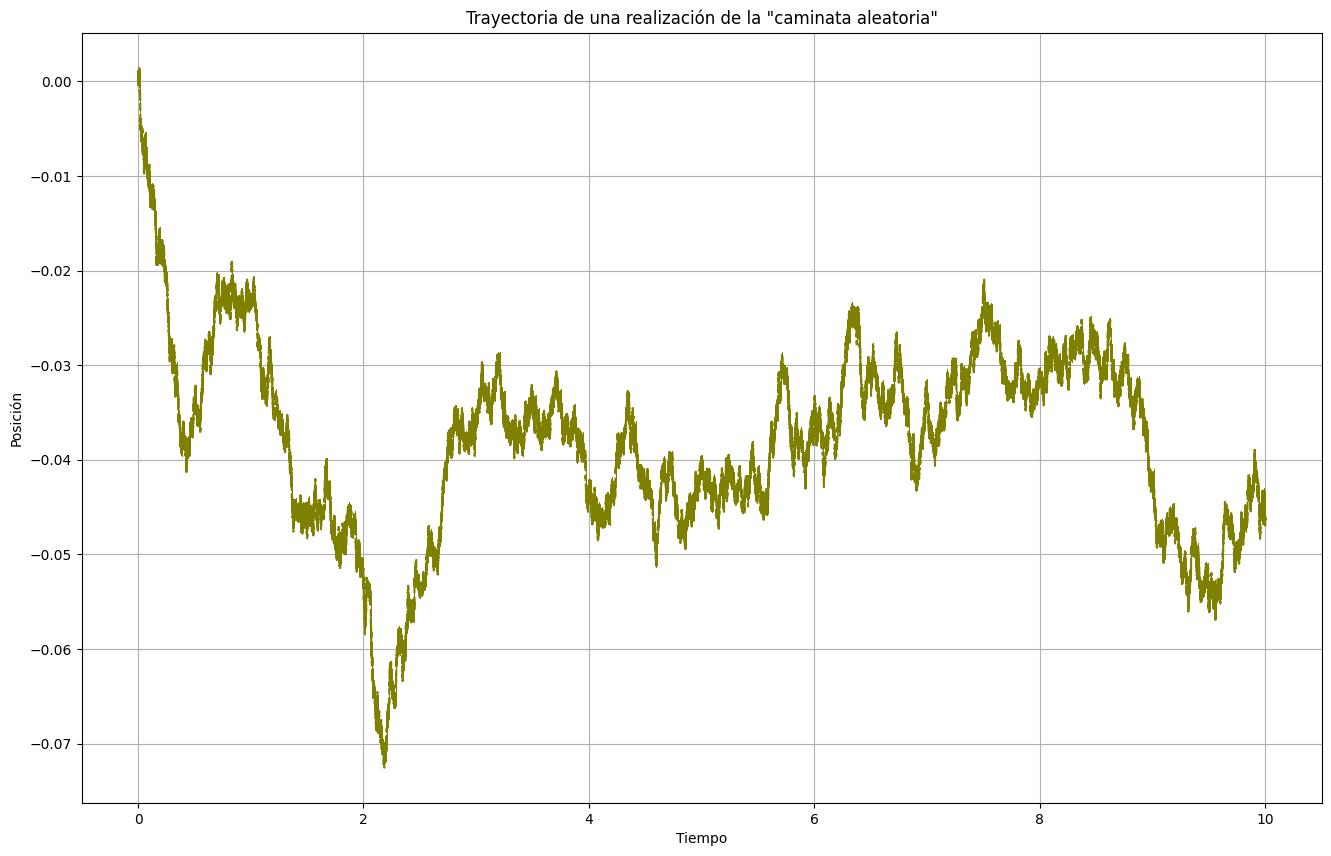

In [44]:
Ts = np.arange(0,t+delta,delta)
plt.figure(figsize=[16,10])
plt.plot(Ts,Tray,linestyle='--',marker=',',color='olive')
plt.title('Trayectoria de una realización de la "caminata aleatoria"')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.show()

**Definición.** Sea $(B_t^{(1)})_{t\geq0}$ un movimiento Browniano no estándar y $\mu\in\mathbb{R}$, decimos que $(B_t^{(2)})_{t\geq0}$ es un movimiento Browniano **con deriva** de media $\mu$ y varianza $\sigma^2$ si para cada $t\geq0$:
$$B_t^{(2)}=\mu t+B_t^{(1)}=\mu t+\sigma B_t.$$
Notemos que esto es casi idéntico a la transformación que se aplica cuando queremos convertir una $N(0,1)$ a una $N(\mu,\sigma^2)$, sólo que ahora depende del tiempo.<br>
Esta vez se tiene que la densidad del proceso $f_{B_t}(x,t;\mu,\sigma)$ satisface la EDP de difusión:
$$\frac{1}{2}\sigma\frac{\partial^2f}{\partial x^2}+\mu\frac{\partial f}{\partial x}=\frac{\partial f}{\partial t},\qquad f(x,0)=\delta(x)$$
o la EDE
$$dX_t=\mu dt+\sigma dB_t.$$
La evolución de las densidades puede verse como:

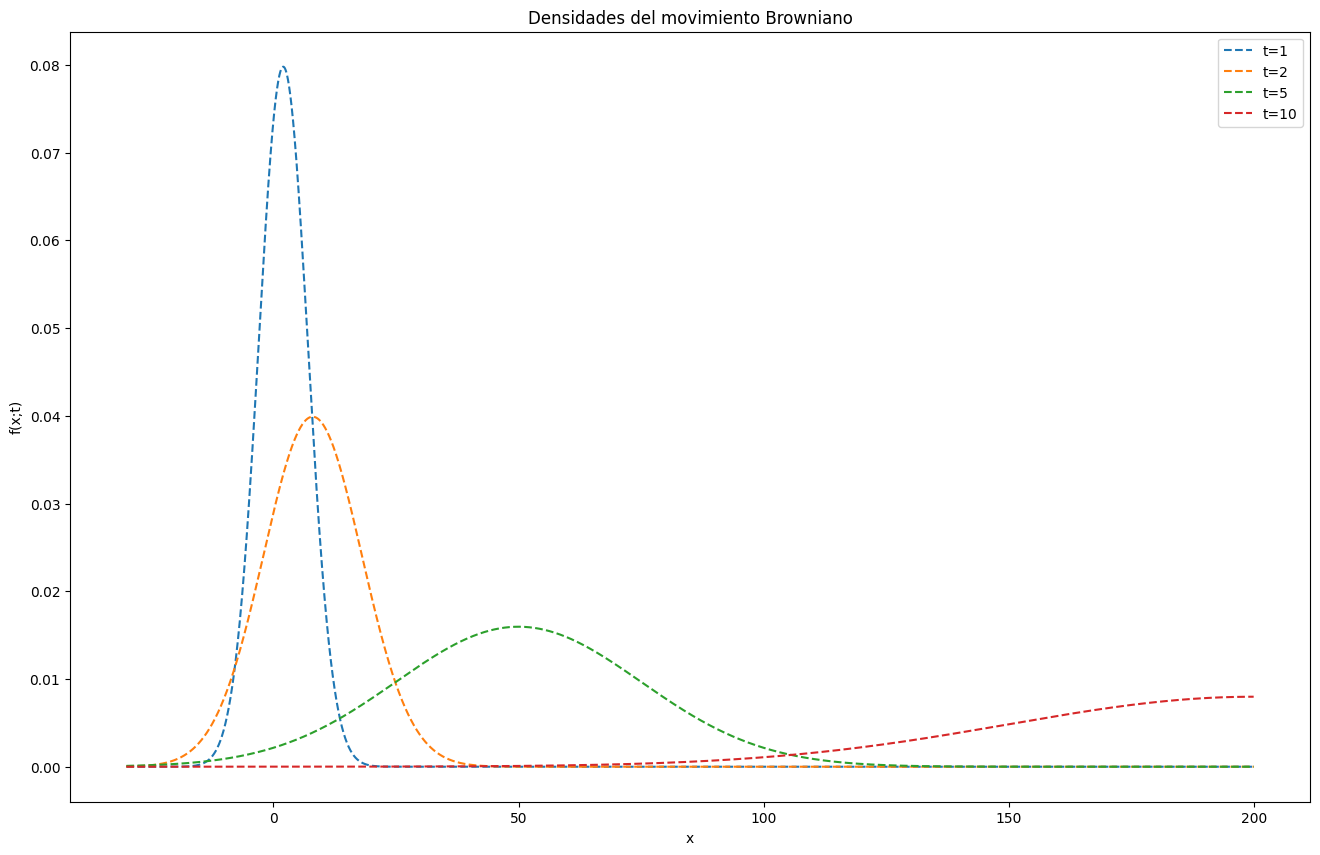

In [53]:
mu = 2
sd = 5
x = np.arange(-30,200,0.01)
plt.figure(figsize=[16,10])
for k in [1,2,5,10]:
    plt.plot(x,sc.stats.norm.pdf(x,mu*(k**2),sd*k),linestyle='--',label='t=%s'%k)
plt.title('Densidades del movimiento Browniano con deriva')
plt.xlabel('x')
plt.ylabel('f(x;t)')
#plt.grid('on')
plt.legend()
plt.show()

Con lo que respecta al proceso tal cual, basta simular un movimiento Browniano no estándar *y a cada tiempo, moverlo un $\mu t$.

In [197]:
# Hasta qué tiempo queremos el proceso
t = 10
# Cuántos pasos queremos
n = 5000
# Definimos el tamaño del paso como
delta = t/n
# Media
mu = 0.1
# Desviación estándar
sd = 2
# Los caminos que puede tomar el caminante
Dirs = [-sd*delta,sd*delta]
# Definimos las probas de la caminata simétrica
p = 0.5
Probas = [1-p, p]

In [198]:
# Replicamos lo de la caminata aleatoria
Pasos = rnd.choices(Dirs,Probas,k=n)
Pasos = np.insert(Pasos,0,0)
Ts = np.arange(0,t+delta,delta)
Tray = np.cumsum(Pasos)+mu*Ts
Pasos

array([ 0.   , -0.004, -0.004, ...,  0.004, -0.004,  0.004])

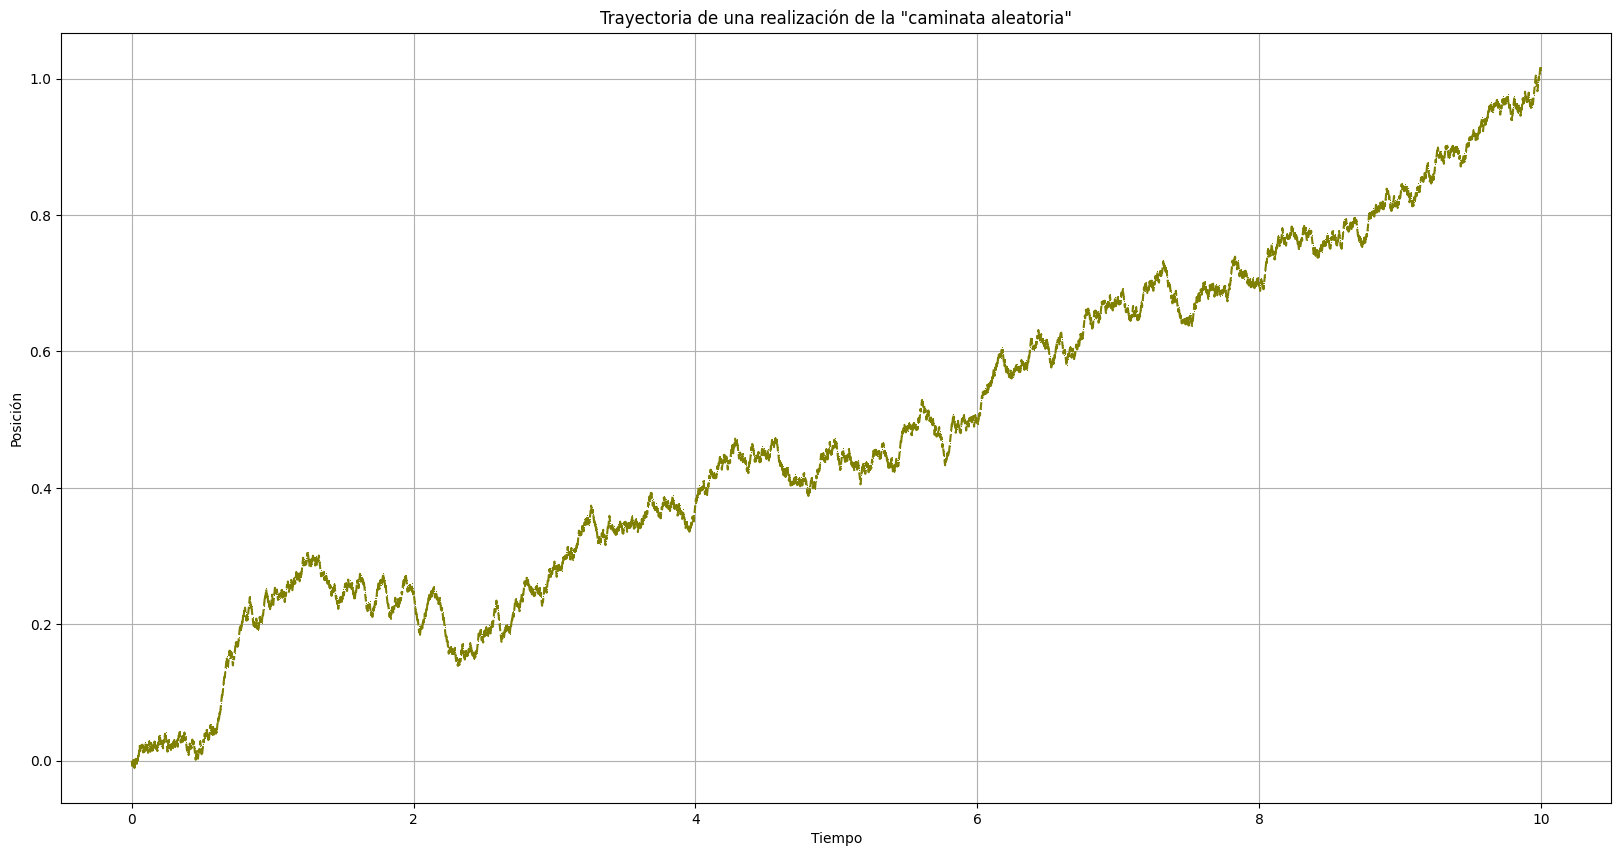

In [199]:
plt.figure(figsize=[20,10])
plt.plot(Ts,Tray,linestyle='--',marker=',',color='olive')
plt.title('Trayectoria de una realización de la "caminata aleatoria"')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.show()

**Definición.** Sea $(B_t^{(2)})_{t\geq0}$ un movimiento Browniano no estándar con deriva de parámetros $\mu,\sigma^2$, decimos que $(B_t^{(3)})_{t\geq0}$ es un movimiento Browniano **geométrico** si para cada $t\geq0$:
$$B_t^{(3)}=e^{B_t^{(2)}}=e^{\mu t+\sigma B_t}.$$
Notemos que esto es casi idéntico a la transformación que se aplica cuando queremos convertir una $N(0,1)$ a una $N(\mu,\sigma^2)$, sólo que ahora depende del tiempo.<br>
Esta vez se tiene que la densidad del proceso $f_{B_t}(x,t;\mu,\sigma)$ satisface la EDP de difusión:
$$\frac{1}{2}\sigma\frac{\partial^2f}{\partial x^2}+\mu\frac{\partial f}{\partial x}=\frac{\partial f}{\partial t},\ \text{con}\ x=\ln\frac{S}{S_0},\qquad f(x,0)=\delta(x)$$
o la EDE
$$dX_t=\mu X_tdt+\sigma X_tdB_t.$$
Para entender la evolución de las densidades, notemos que los movimientos Brownianos con deriva son tales que:
$$B_t^{(2)}\sim N(\mu t,\sigma t)\implies B_t^{(3)}\sim\text{LogNormal}(\mu t,\sigma t)$$
En particular, el movimiento Browniano geométrico siempre es positivo.<br>
Para simularlo, basta tomar la exponencial del movimiento Browniano con deriva que ya tenemos.

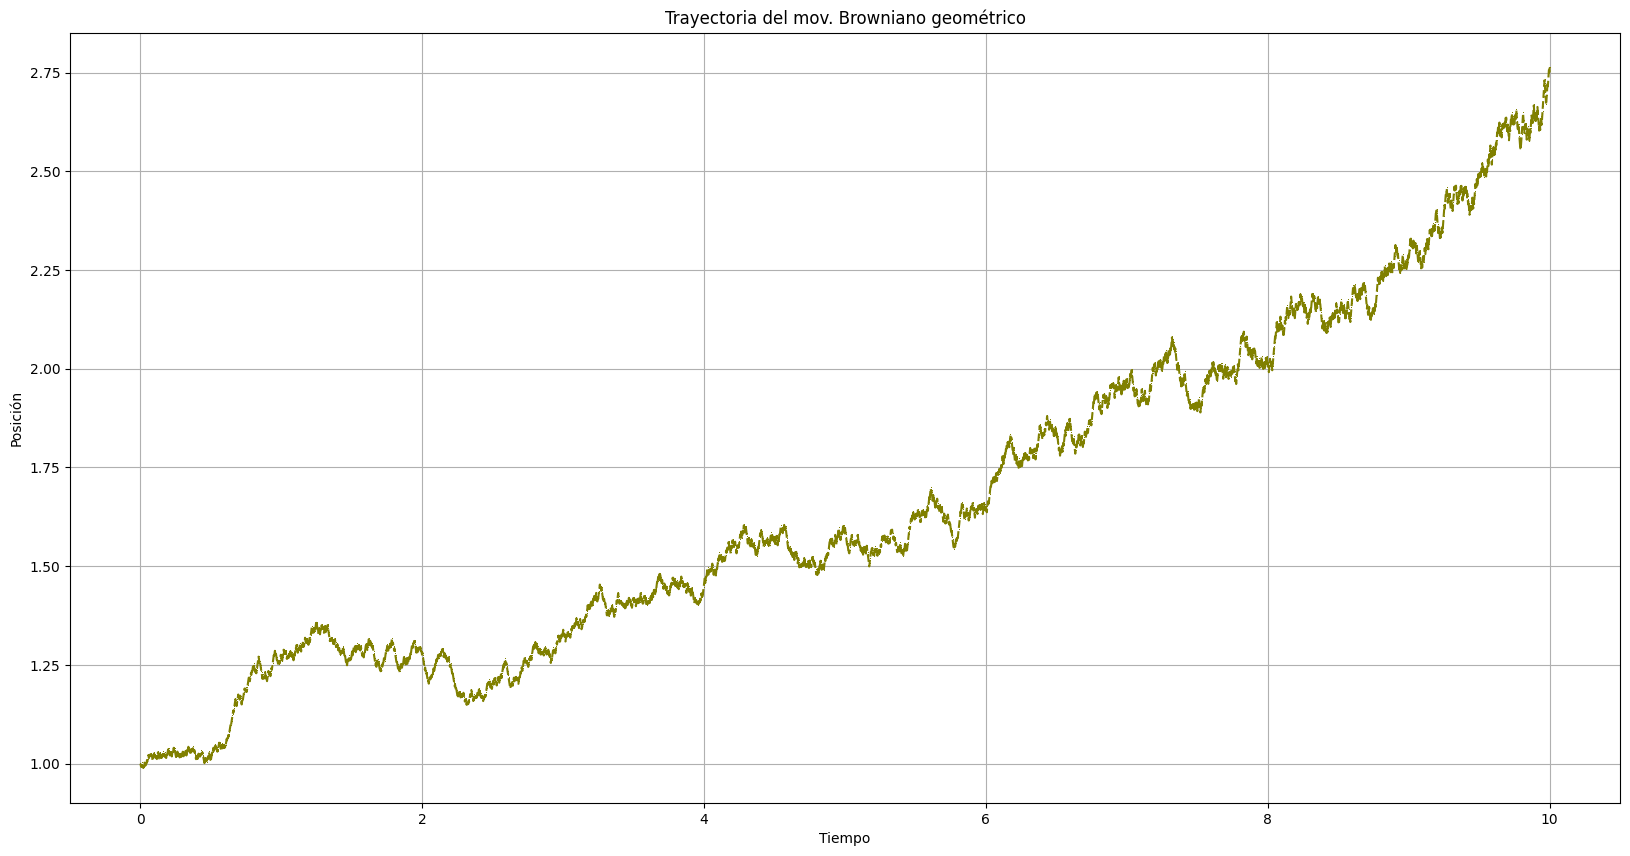

In [200]:
TrayGeom = np.exp(Tray)
plt.figure(figsize=[20,10])
plt.plot(Ts,TrayGeom,linestyle='--',marker=',',color='olive')
plt.title('Trayectoria del mov. Browniano geométrico')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.show()